# Exploratory Data Analysis 
## Data loading. General information

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
df_train = pd.read_csv('input/train.csv').drop(columns=['Unnamed: 0'])
df_test = pd.read_csv('input/test_no_target.csv').drop(columns=['Unnamed: 0'])

Here is a general view to our data set and it really looks not good. From the first look there a lot of NaN, something is wrong with **Registration Year** (there 3, 4, 1996 and 2016 values), **power** has 0 value and we can see a lot of limousines in the **type** column. To clear all this mass will be a real chalange

In [4]:
df_train

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price,price
0,2.0,bus,2006,auto,140,c4,150000,gasoline,citroen,0.0,49191,380.0,4267
1,NaN,NaN,2016,NaN,0,vito,150000,NaN,mercedes_benz,NaN,45896,NaN,2457
2,2.2,limousine,2010,manual,175,mondeo,125000,diesel,ford,0.0,59229,930.0,10374
3,NaN,NaN,2000,auto,265,andere,150000,gasoline,ford,0.0,39365,680.0,7098
4,NaN,convertible,3,manual,109,2_reihe,150000,gasoline,peugeot,0.0,55271,NaN,2365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.4,limousine,2006,manual,75,golf,90000,gasoline,volkswagen,0.0,35745,500.0,4686
49996,1.3,small car,4,manual,60,fiesta,150000,gasoline,ford,0.0,60386,NaN,864
49997,NaN,limousine,1996,manual,150,5er,150000,gasoline,bmw,0.0,28309,130.0,2275
49998,NaN,limousine,2007,manual,122,1er,100000,diesel,bmw,0.0,83623,500.0,8144


A general information about this data set

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_capacity    19950 non-null  float64
 1   type               43746 non-null  object 
 2   registration_year  50000 non-null  int64  
 3   gearbox            47959 non-null  object 
 4   power              50000 non-null  int64  
 5   model              47743 non-null  object 
 6   mileage            50000 non-null  int64  
 7   fuel               46417 non-null  object 
 8   brand              50000 non-null  object 
 9   damage             41734 non-null  float64
 10  zipcode            50000 non-null  int64  
 11  insurance_price    42669 non-null  float64
 12  price              50000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.0+ MB


And the main statistics

In [9]:
df_train.describe()

,engine_capacity,registration_year,power,mileage,damage,zipcode,insurance_price,price
count,19950.000000,50000.000000,50000.000000,50000.000000,41734.000000,50000.000000,42669.000000,50000.000000
mean,1.867213,1839.195200,121.105060,125206.200000,0.096157,51436.403920,421.345239,5746.904380
std,0.808440,545.974243,188.787938,39587.836838,0.294809,25808.985658,679.444359,7688.683102
min,0.000000,0.000000,0.000000,5000.000000,0.000000,1067.000000,10.000000,455.000000
25%,1.400000,1998.000000,75.000000,100000.000000,0.000000,30989.000000,100.000000,1365.000000
50%,1.800000,2003.000000,110.000000,150000.000000,0.000000,50374.000000,230.000000,3185.000000
75%,2.000000,2008.000000,150.000000,150000.000000,0.000000,72415.000000,510.000000,7270.000000
max,9.500000,2016.000000,16311.000000,150000.000000,1.000000,99998.000000,38960.000000,163800.000000


## Duplicates

In [5]:
len(df_train[df_train.duplicated()])

45

And duplicates. I found 45 duplicated rows in this dataset, which definitely effect our model training

## Missing Data

If I drop rows where at least one cell contains “NaN”, as a result will receive only the third part of data set full of data. Here is general info.

In [6]:
df_train.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14554 entries, 0 to 49995
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_capacity    14554 non-null  float64
 1   type               14554 non-null  object 
 2   registration_year  14554 non-null  int64  
 3   gearbox            14554 non-null  object 
 4   power              14554 non-null  int64  
 5   model              14554 non-null  object 
 6   mileage            14554 non-null  int64  
 7   fuel               14554 non-null  object 
 8   brand              14554 non-null  object 
 9   damage             14554 non-null  float64
 10  zipcode            14554 non-null  int64  
 11  insurance_price    14554 non-null  float64
 12  price              14554 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.6+ MB


NaN distribution looks like as following:

all_data size is : (100000, 12)


<Figure size 1152x576 with 0 Axes>

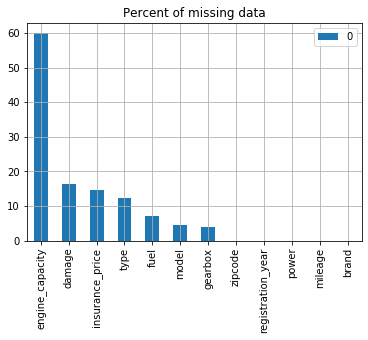

In [7]:
all_data = pd.concat((df_train, df_test), sort = 'True').reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))
missing_data = pd.DataFrame((all_data.isnull().sum() / len(all_data)).sort_values(ascending = False)*100)
plt.figure(figsize = (16,8))
missing_data.head(30).plot(kind = 'bar')
plt.title('Percent of missing data')
plt.grid()
plt.show()

## Target Value destribution
Our Targeg – The Car **Price** has really big variance  (0 – 163000) and it doesn’t look like normal distribution this will definitely effect training process, let’s normalize it with logarithmic function. Another problem is the column ** insurance price** which is most important feature here. Histograms, Boxplots and Probability plots are bellow:

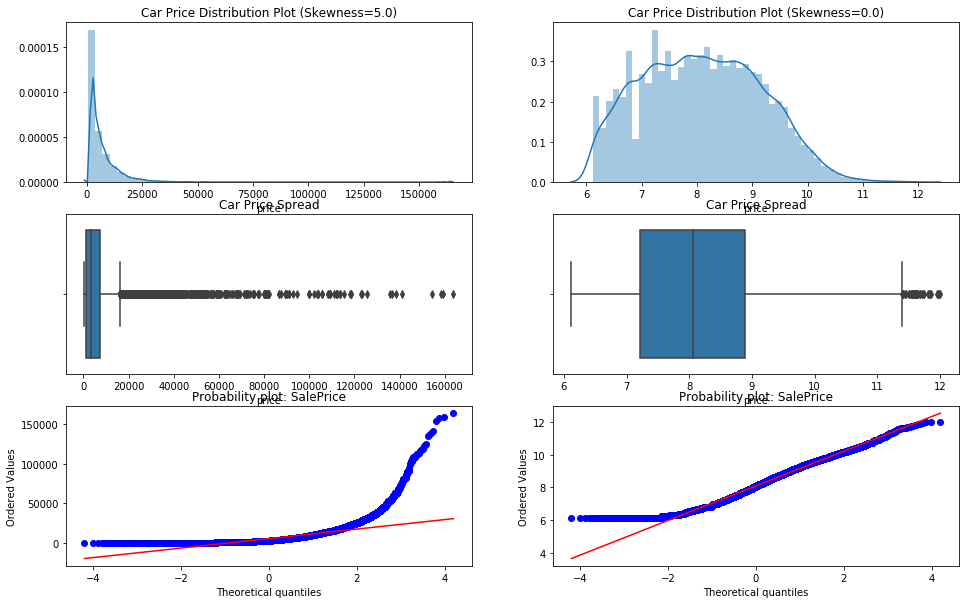

In [11]:
df = df_train
fig, ax = plt.subplots(3, 2, figsize=(16,10))
ax[0,0].title.set_text('Car Price Distribution Plot (Skewness={})'.format(round(df.price.skew()), 3)) #skew<1.88 - norm
sns.distplot(df.price, ax=ax[0,0])
ax[1,0].title.set_text('Car Price Spread')
sns.boxplot(df.price, ax=ax[1,0])
stats.probplot(df.price, plot=ax[2,0])
ax[2,0].title.set_text("Probability plot: SalePrice")

ax[0,1].title.set_text('Car Price Distribution Plot (Skewness={})'.format(round(np.log(df.price).skew()), 3)) #skew<1.88 - norm
sns.distplot(np.log(df.price), ax=ax[0,1])
ax[1,1].title.set_text('Car Price Spread')
sns.boxplot(np.log(df.price), ax=ax[1,1])
stats.probplot(np.log(df.price), plot=ax[2,1])
ax[2,1].title.set_text("Probability plot: SalePrice")
plt.show()

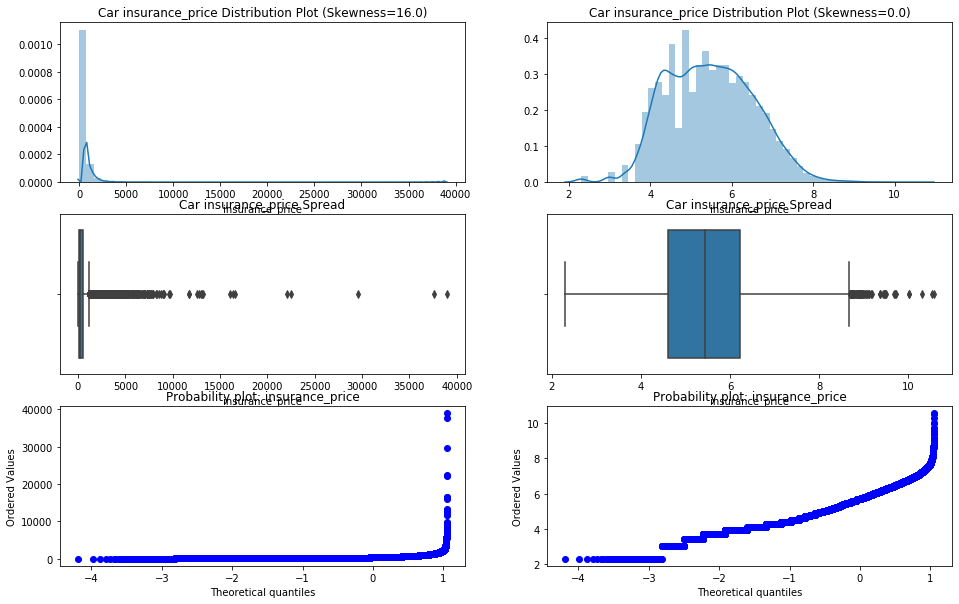

In [12]:
with np.errstate(invalid='ignore'):
    fig, ax = plt.subplots(3, 2, figsize=(16,10))
    ax[0,0].title.set_text('Car insurance_price Distribution Plot (Skewness={})'.format(round(df.insurance_price.skew()), 3)) #skew<1.88 - norm
    sns.distplot(df.insurance_price, ax=ax[0,0])
    ax[1,0].title.set_text('Car insurance_price Spread')
    sns.boxplot(df.insurance_price, ax=ax[1,0])
    stats.probplot(df.insurance_price, plot=ax[2,0])
    ax[2,0].title.set_text("Probability plot: insurance_price")

    ax[0,1].title.set_text('Car insurance_price Distribution Plot (Skewness={})'.format(round(np.log(df.insurance_price).skew()), 3)) #skew<1.88 - norm
    sns.distplot(np.log(df.insurance_price), ax=ax[0,1])
    ax[1,1].title.set_text('Car insurance_price Spread')
    sns.boxplot(np.log(df.insurance_price), ax=ax[1,1])
    stats.probplot(np.log(df.insurance_price), plot=ax[2,1])
    ax[2,1].title.set_text("Probability plot: insurance_price")
plt.show()

## Correlation matrix
Let’s evaluate correlation between each feature using correlation matrix. Before start this lets encode all categorical features to include it into analysis

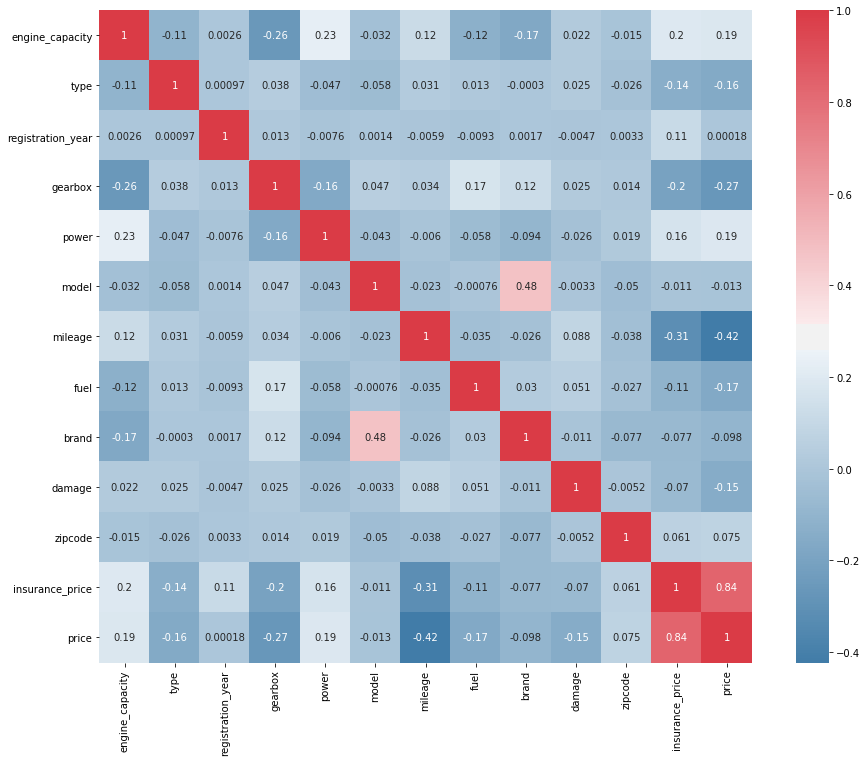

In [13]:
from sklearn.preprocessing import LabelEncoder
cat_features = ["type", "gearbox", "model", "fuel", "brand"]
df[cat_features] = df[cat_features].astype(str)
for cat_feature in cat_features:
    df[cat_feature] = LabelEncoder().fit_transform(df[cat_feature])
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), 
            mask=np.zeros_like(df.corr(), dtype=np.bool), 
            cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax,
           annot=True)

## Feature importance as per XGBoost
Another really good tool for feature evaluation is model feature selection  using a model, for example XGBoost as one of the best for regression tasks. Lets try it for data set with all NaNs and that drop NaN rows and do it the same

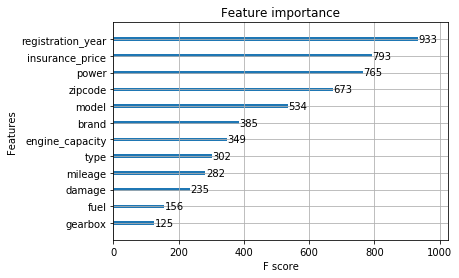

In [14]:
from xgboost import XGBRegressor
from xgboost import plot_importance
X = df.drop('price', 1)
y = np.log1p(df['price'])
model = XGBRegressor().fit(X,y)
model.get_booster().feature_names = list(df.columns)[:-1]
plot_importance(model.get_booster())

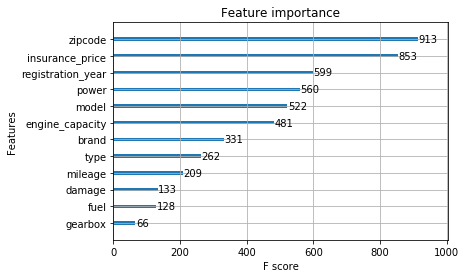

In [15]:
df = df.dropna(axis=0)
X = df.drop('price', 1).dropna(axis=0)
y = np.log1p(df['price'])
model = XGBRegressor().fit(X,y)
model.get_booster().feature_names = list(df.columns)[:-1]
plot_importance(model.get_booster())

## Pаirplot
Another interesting tool for data analysis is a pair plot, that shows dependencies between pairs of features

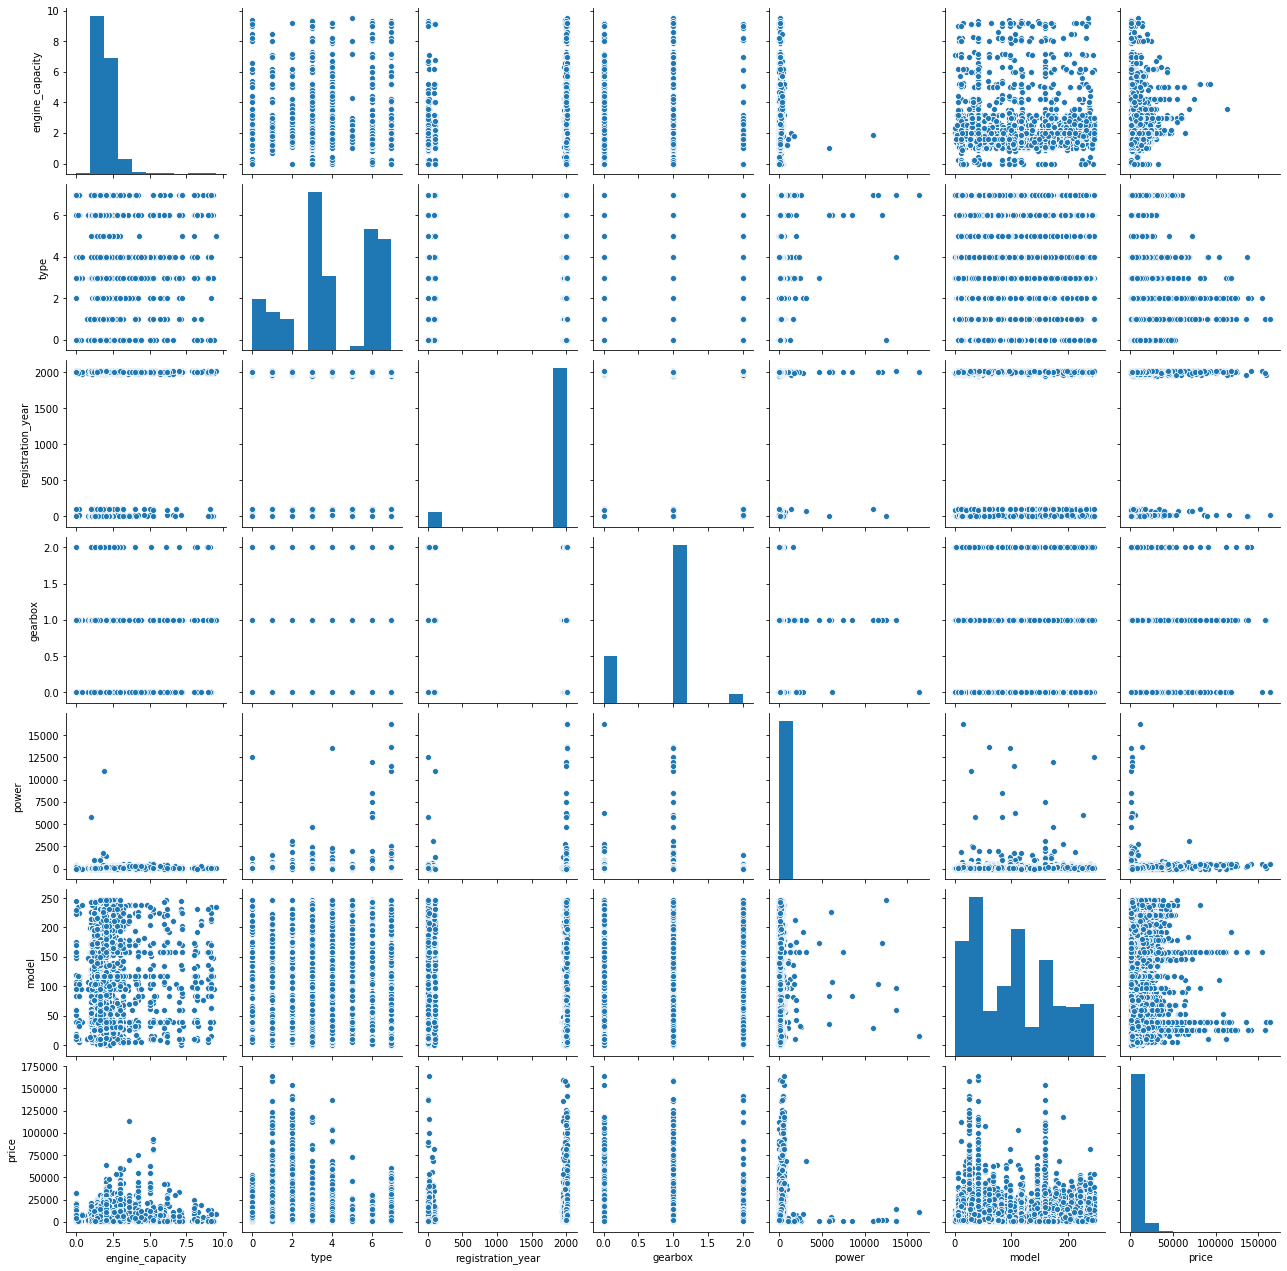

In [12]:
lst = list(df.columns[:6])
lst.append('price')
sns.pairplot(df[lst])

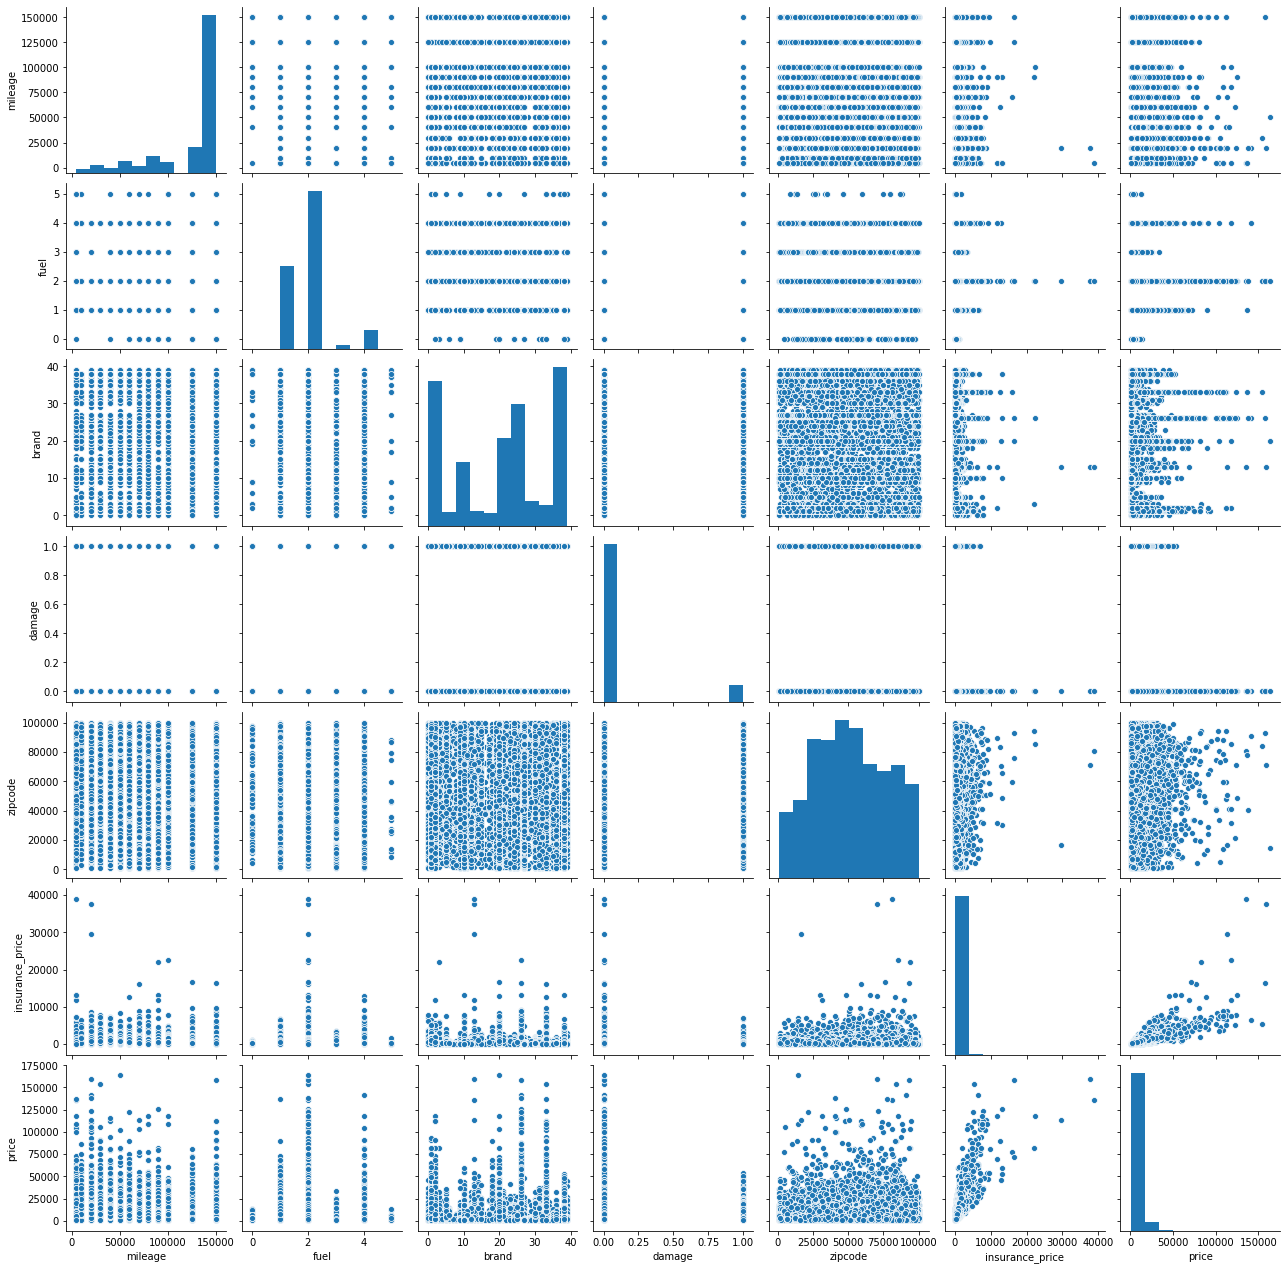

In [13]:
lst = list(df.columns[6:])
sns.pairplot(df[lst])

And the last analysis is histogram and whisker boxplot of all features, where clearly seen all distributions, meanі, outliers, and other visualized statistic info

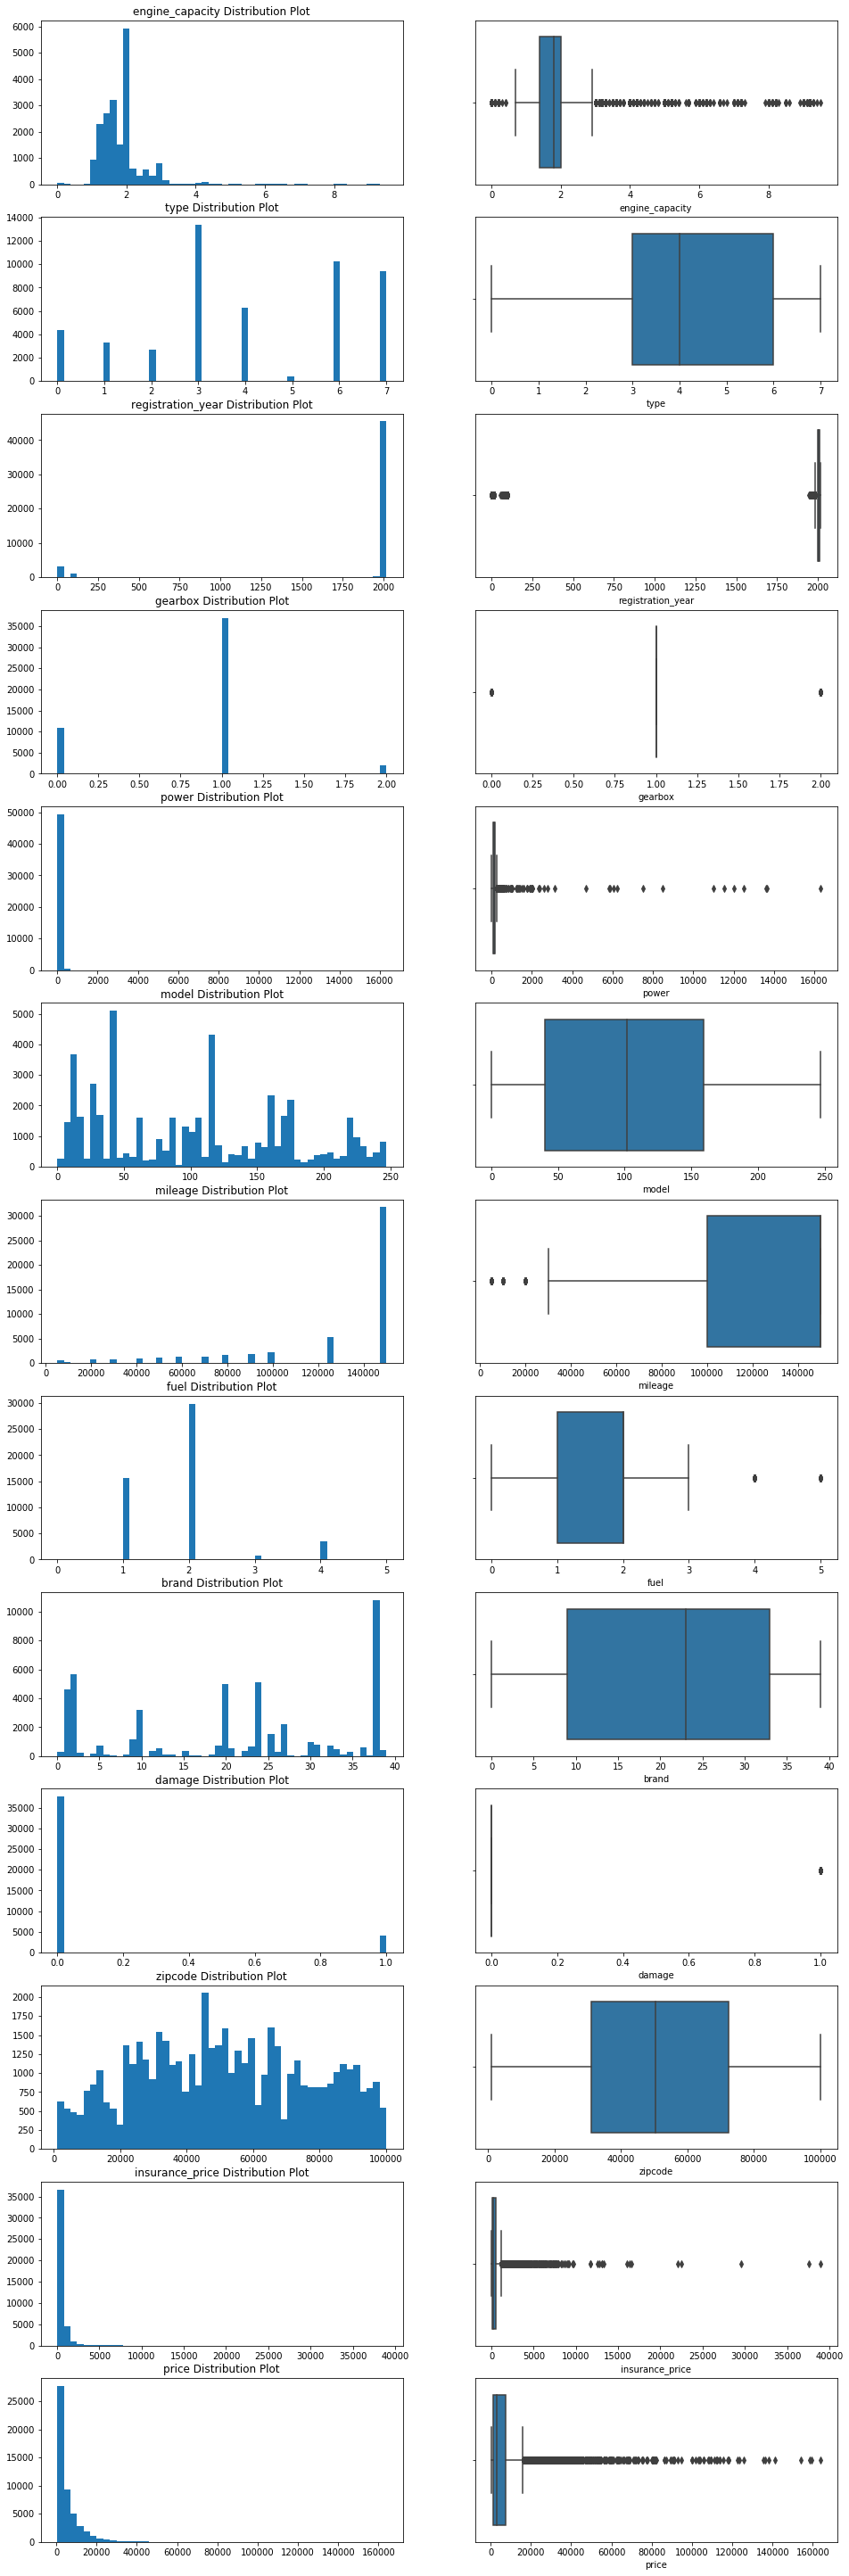

In [14]:
feat_lst = df.columns
with np.errstate(invalid='ignore'):
    fig, ax = plt.subplots(len(feat_lst),2, figsize=(16, 4 * len(feat_lst)))
    for n, feat in enumerate(feat_lst):
        ax[n,0].title.set_text(feat+ ' Distribution Plot')
        ax[n,0].hist(df[feat], bins=50)
        sns.boxplot(df[feat], ax=ax[n,1])
plt.show()

